<a href="https://colab.research.google.com/github/DavidEnriqueOrtiz/proyecto-2-Clasificadores/blob/main/proyecto_2_progra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación con Modelos Supervisados

Este código implementa un análisis de datos para clasificación usando **Regresión Logística** y **k-Nearest Neighbors (k-NN)**. A continuación, un resumen de los pasos:



## 1. **Carga y Preprocesamiento de Datos**

- **Lectura del archivo CSV:** Se cargan los datos, excluyendo los encabezados.
- **Separación de datos:** Las características (`X`) y etiquetas (`y`) se dividen en conjuntos de entrenamiento (70%) y validación (30%) con `train_test_split`.
- **Manejo de errores:** Se gestionan excepciones por problemas de archivo o formato.

## 2. **Modelos Implementados**

1. **Regresión Logística:**
   - Entrena el modelo con `LogisticRegression`.
   - Calcula predicciones y métricas de desempeño.

2. **k-NN:**
   - Utiliza `KNeighborsClassifier` con un valor predeterminado de `k=3`.
   - Evalúa las predicciones con métricas estándar.



## 3. **Evaluación y Resultados**

- **Métricas:** Precisión, reporte de clasificación y matriz de confusión.
- **Gráfica:** Comparación de las precisiones en un gráfico de barras.


Entrenando modelo: Logistic Regression

Modelo: Logistic Regression
Precisión: 0.97
Reporte de Clasificación:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        89
           M       1.00      0.93      0.97        61

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Matriz de Confusión:
[[89  0]
 [ 4 57]]
Entrenando modelo: k-NN


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Modelo: k-NN
Precisión: 0.95
Reporte de Clasificación:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96        89
           M       0.97      0.92      0.94        61

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Matriz de Confusión:
[[87  2]
 [ 5 56]]


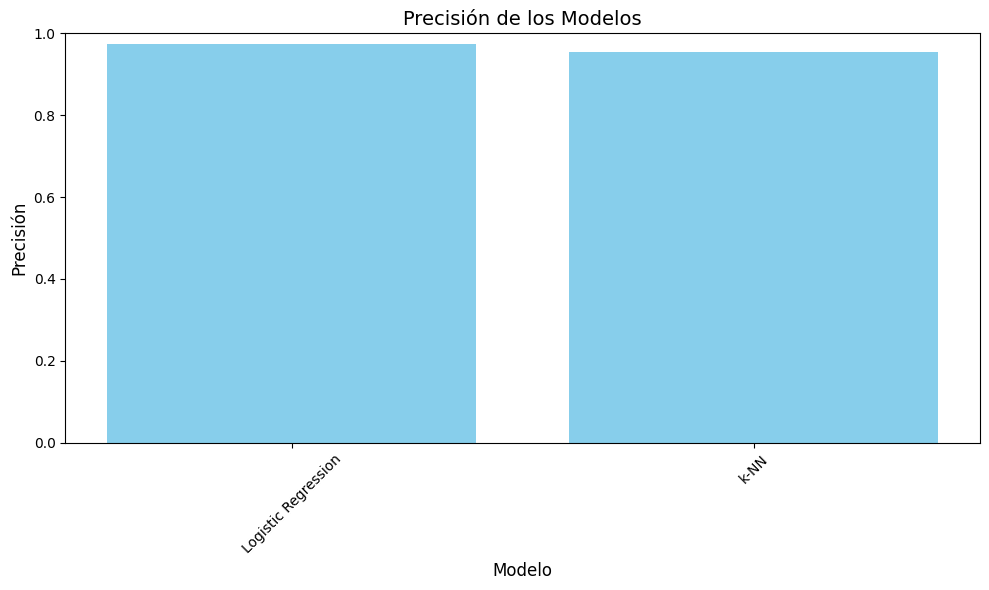


El mejor modelo es: Logistic Regression con precisión de 0.97


In [5]:
from csv import reader
from math import sqrt
from random import seed, shuffle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class Clasificadores:
    def __init__(self, archivo_csv):
        # Manejo de excepciones al cargar datos
        try:
            with open(archivo_csv, 'r') as archivo:
                datos = list(reader(archivo))
                self.datos = datos[1:]  # Excluir encabezados
        except FileNotFoundError:
            print(f"Error: El archivo {archivo_csv} no se encontró.")
            raise
        except Exception as e:
            print(f"Error al procesar el archivo CSV: {e}")
            raise

        # Separar características (X) y etiquetas (y)
        self.X = [list(map(float, fila[2:])) for fila in self.datos]  # Características
        self.y = [fila[1] for fila in self.datos]  # Etiquetas

        # División de datos
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42
        )

    def logistic_regression(self):
        # Clasificador: Regresión Logística
        modelo = LogisticRegression(max_iter=200)
        modelo.fit(self.X_train, self.y_train)
        y_pred = modelo.predict(self.X_val)
        self.mostrar_metricas("Logistic Regression", y_pred)
        return accuracy_score(self.y_val, y_pred)

    def knn(self, k=3):
        # Clasificador: k-Nearest Neighbors
        modelo = KNeighborsClassifier(n_neighbors=k)
        modelo.fit(self.X_train, self.y_train)
        y_pred = modelo.predict(self.X_val)
        self.mostrar_metricas("k-NN", y_pred)
        return accuracy_score(self.y_val, y_pred)

    def mostrar_metricas(self, nombre, y_pred):
        # Imprime métricas para el modelo
        print(f"\nModelo: {nombre}")
        print(f"Precisión: {accuracy_score(self.y_val, y_pred):.2f}")
        print("Reporte de Clasificación:")
        print(classification_report(self.y_val, y_pred))
        print("Matriz de Confusión:")
        print(confusion_matrix(self.y_val, y_pred))

    def graficar_resultados(self, resultados):
        # Genera una gráfica de barras con los resultados
        nombres = [nombre for nombre, _ in resultados]
        precisiones = [precision for _, precision in resultados]

        plt.figure(figsize=(10, 6))
        plt.bar(nombres, precisiones, color='skyblue')
        plt.title('Precisión de los Modelos', fontsize=14)
        plt.xlabel('Modelo', fontsize=12)
        plt.ylabel('Precisión', fontsize=12)
        plt.ylim(0, 1)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()

    def entrenar_y_evaluar(self):
        # Entrena y evalúa múltiples clasificadores
        modelos = {
            "Logistic Regression": self.logistic_regression,
            "k-NN": self.knn
        }

        resultados = []
        for nombre, metodo in modelos.items():
            try:
                print(f"Entrenando modelo: {nombre}")
                precision = metodo()
                resultados.append((nombre, precision))
            except Exception as e:
                print(f"Error en {nombre}: {e}")

        self.graficar_resultados(resultados)
        return resultados

if __name__ == "__main__":
    archivo_csv = "cancer.csv"  # Archivo con datos de cáncer
    modelo_clasificadores = Clasificadores(archivo_csv)
    resultados = modelo_clasificadores.entrenar_y_evaluar()

    if resultados:
        mejor_modelo = max(resultados, key=lambda x: x[1])
        print(f"\nEl mejor modelo es: {mejor_modelo[0]} con precisión de {mejor_modelo[1]:.2f}")
